In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [48]:
sns.set()

In [49]:
def load_data(subfolder = 'bitcoin', dataset = 'bitflyerJPY_1-min_data_2017-07-04_to_2018-06-27.csv'):
    data_path = '../../../Documents/DataScience/datasets/'
    return pd.read_csv(data_path + subfolder + '/' + dataset)

In [50]:
bc = load_data('bitcoin','bitflyerJPY_1-min_data_2017-07-04_to_2018-06-27.csv')
er = load_data('ethereum', 'EtherPriceHistory(USD).csv')

In [51]:
# Scaling factor to get er['Price'] and bc['Weighted_Price'] in the same units
er['Price'] = 1000 * er['Value']
bc['Price'] = bc['Weighted_Price']

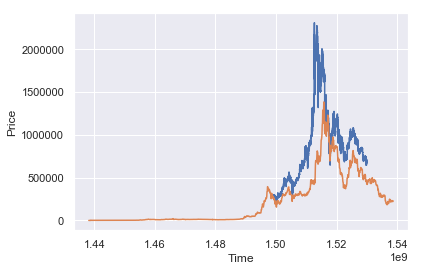

In [52]:
x1 = bc['Timestamp']
y1 = bc['Weighted_Price']
x2 = er['UnixTimeStamp']
y2 = er['Price']
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [53]:
# Bucket price by time windows and have one point for bc and er for each bucket
number_of_buckets = 10
timestamp_min = np.maximum(bc['Timestamp'].values.min(), er['UnixTimeStamp'].values.min())
timestamp_max = np.minimum(bc['Timestamp'].values.max(), er['UnixTimeStamp'].values.max())
buckets = np.linspace(timestamp_min, timestamp_max, number_of_buckets)
bc['Timegroup'] = pd.cut(bc['Timestamp'], buckets)
er['Timegroup'] = pd.cut(er['UnixTimeStamp'], buckets)
bc_gp = bc.groupby('Timegroup').agg(['mean'])[['Timestamp','Price']]
er_gp = er.groupby('Timegroup').agg(['mean'])[['UnixTimeStamp','Price']]
times_bc = bc_gp.values[:,0]
times_er = er_gp.values[:,0] # times_er should be the same as times_bc
price_bc = bc_gp.values[:,1]
price_er = er_gp.values[:,1]

9

[0.48504683]
0.6822014007030442


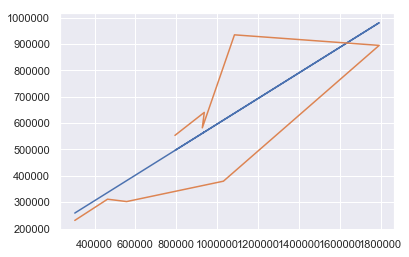

In [59]:
# Regression between bc['Weighted_Price'] and er['Price']
# First just train on the entire dataset with linear regression
# Hypothesis: There may be a good correlation
r1 = LinearRegression()
r1.fit(price_bc.reshape(-1, 1), price_er)
print(r1.coef_)
print(r1.score(price_bc.reshape(-1, 1), price_er))

plt.plot(price_bc, r1.predict(price_bc.reshape(-1, 1)))
plt.plot(price_bc, price_er)

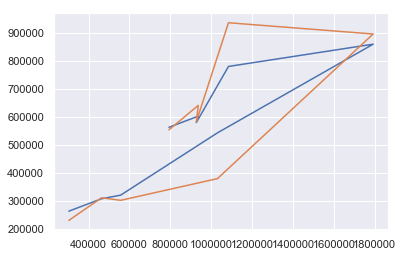

In [60]:
# Next just train on the entire dataset with random forest regression
# Hypothesis: this won't work well
r2 = RandomForestRegressor(n_estimators=1000, random_state=0)
r2.fit(price_bc.reshape(-1, 1), price_er)
#print(r2.coef_)
#print(r2.score(price_bc.reshape(-1, 1), price_er))

plt.plot(price_bc, r2.predict(price_bc.reshape(-1, 1)))
plt.plot(price_bc, price_er)

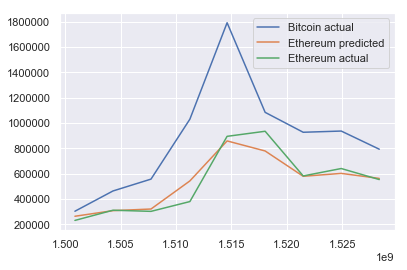

In [63]:
plt.plot(times_bc, price_bc, label='Bitcoin actual')
plt.plot(times_bc, r2.predict(price_bc.reshape(-1, 1)), label='Ethereum predicted')
plt.plot(times_bc, price_er, label='Ethereum actual')
plt.legend()